## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
data = pd.read_csv('Titanic_train.csv')

In [5]:
#計算每一行是否有遺失值，計算遺失比例
# missing_vals = data.isnull().sum()/len(data)
# missing_vals.sort_values(ascending=False)
# missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
# print(missing_vals)

missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


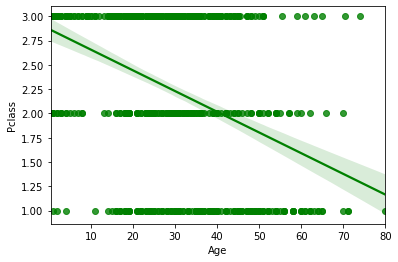

In [7]:
g = sns.regplot(x="Age", y="Pclass", color="g",data=data)
#年齡和身高有關連

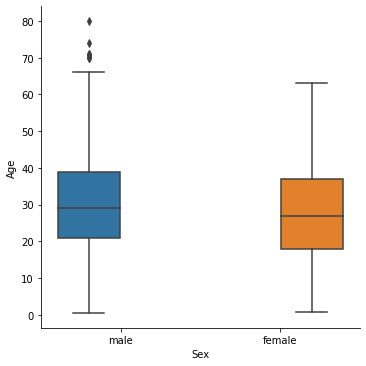

In [10]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=data,kind="box")

In [22]:
new_data = pd.DataFrame(data,columns=['Sex','Age','Pclass']) #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
new_data['Sex'] = le.fit_transform(new_data['Sex'])
display(new_data)

,Sex,Age,Pclass
0,1,22.0,3
1,0,38.0,1
2,0,26.0,3
3,0,35.0,1
4,1,35.0,3
...,...,...,...
886,1,27.0,2
887,0,19.0,1
888,0,NaN,3
889,1,26.0,1


In [23]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(new_data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [24]:
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(new_data))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,26.0,3.0
889,1.0,26.0,1.0


In [25]:
# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer.fit_transform(new_data))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,26.0,3.0
889,1.0,26.0,1.0


In [26]:
# KNN
value_neighbors=2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled = pd.DataFrame(imputer.fit_transform(new_data))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2,3
0,1.0,22.0,3.0,0.0
1,0.0,38.0,1.0,0.0
2,0.0,26.0,3.0,0.0
3,0.0,35.0,1.0,0.0
4,1.0,35.0,3.0,0.0
...,...,...,...,...
886,1.0,27.0,2.0,0.0
887,0.0,19.0,1.0,0.0
888,0.0,26.5,3.0,1.0
889,1.0,26.0,1.0,0.0


## 觀察 Age

In [27]:
#* Step1:取無遺失值的資料集
import random
completet_data = new_data.dropna()
#重製index
completet_data = completet_data.reset_index(drop=True)
display(completet_data)

,Sex,Age,Pclass
0,1,22.0,3
1,0,38.0,1
2,0,26.0,3
3,0,35.0,1
4,1,35.0,3
...,...,...,...
709,0,39.0,3
710,1,27.0,2
711,0,19.0,1
712,1,26.0,1


In [32]:
from sklearn.metrics import mean_squared_error

y_true1 = completet_data['Age']
y_pred1 = df_filled[1]
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)

ValueError: Found input variables with inconsistent numbers of samples: [714, 891]